In [1]:
import json
from datetime import datetime as dt
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
# !pip install mplfinance
import mplfinance as mpl

In [2]:
with open('./typing-data.json') as f: 
    data = json.load(f)

In [3]:
errors = []
speeds = []
timestamps = []
volume = []
for sample in data:
    timestamps.append(dt.strptime(sample['timeStamp'], '%Y-%m-%dT%H:%M:%S.%fZ'))
    speeds.append(sample['speed'])
    errors.append(sample['errors'])
    volume.append(sample['length'])

In [4]:
df = pd.DataFrame(data={"speed": speeds, "errors": errors, "volume": volume}, index=timestamps)
df.head()

,speed,errors,volume
2020-03-24 12:15:27,139,9,123
2020-03-24 12:16:22,196,4,123
2020-03-24 12:17:01,199,6,127
2020-03-24 12:17:40,221,5,124
2020-03-24 12:18:15,202,8,122


In [5]:
day_range = pd.date_range(df.index[0], df.index[len(df.index) - 1], freq = 'D', normalize="True")
ohlc_df = pd.DataFrame(data={'open':0, 'close':0, 
                             'low':0, 'high':0, 'volume':0}, 
                       index=day_range)

In [6]:
opn = close = high = low = volume = df_i = 0

for day in day_range:
    new_day = True
    volume = 0
    high = low = opn = close
    while df_i < 682 and df.index[df_i].date() == day.date():
        speed = df.loc[df.index[df_i]]['speed']
        if new_day:
            opn = close = high = low = speed
            new_day = False
        else:
            if speed > high:
                high = speed
            elif speed < low:
                low = speed
            close = speed
        volume += df.loc[df.index[df_i], 'volume']
        df_i += 1
    ohlc_df.loc[day] = [opn, close, low, high, volume]

In [7]:
for col in ohlc_df.columns:
    ohlc_df[col] = ohlc_df[col].astype(float)

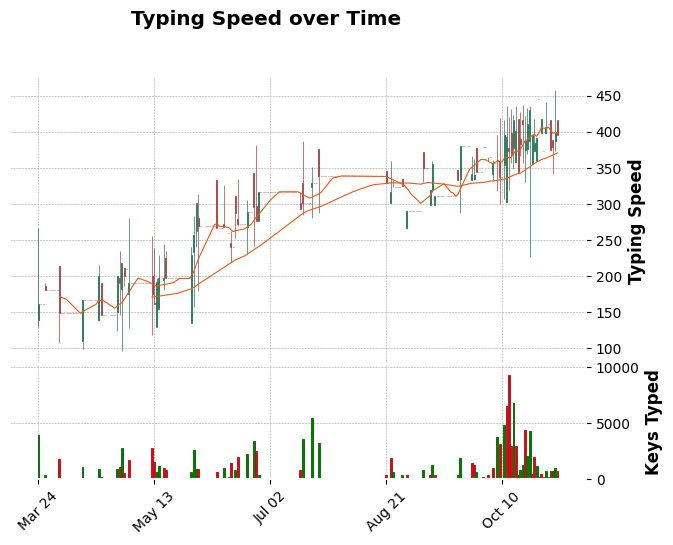

In [8]:
mpl.plot(ohlc_df, type='candle', style='charles',
            title='Typing Speed over Time',
            ylabel='Typing Speed',
            ylabel_lower='Keys Typed',
            volume=True, mav=(10,50))

In [9]:
err_df = pd.DataFrame(data={'open':0, 'close':0, 
                             'low':0, 'high':0, 'volume':0}, 
                       index=day_range)

In [10]:
opn = close = high = low = volume = df_i = 0

for day in day_range:
    new_day = True
    volume = 0
    high = low = opn = close
    while df_i < 682 and df.index[df_i].date() == day.date():
        speed = df.loc[df.index[df_i]]['errors']
        if new_day:
            opn = close = high = low = speed
            new_day = False
        else:
            if speed > high:
                high = speed
            elif speed < low:
                low = speed
            close = speed
        volume += df.loc[df.index[df_i], 'volume']
        df_i += 1
    err_df.loc[day] = [opn, close, low, high, volume]

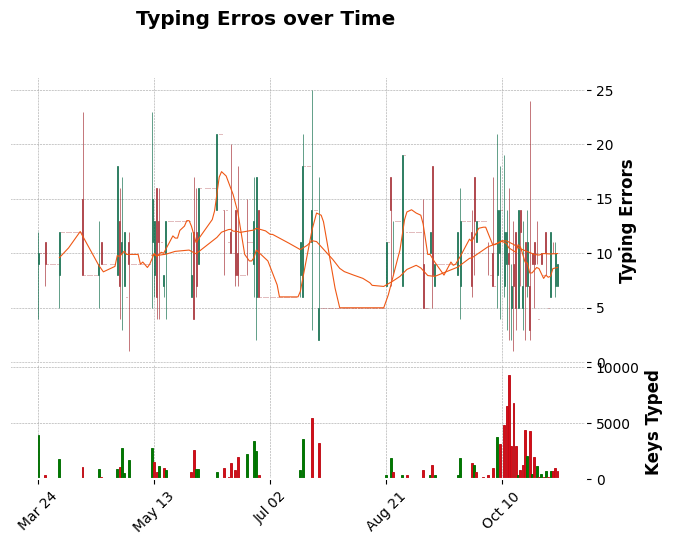

In [11]:
mpl.plot(err_df, type='candle', style='charles',
            title='Typing Erros over Time',
            ylabel='Typing Errors',
            ylabel_lower='Keys Typed',
            volume=True, mav=(10,50))

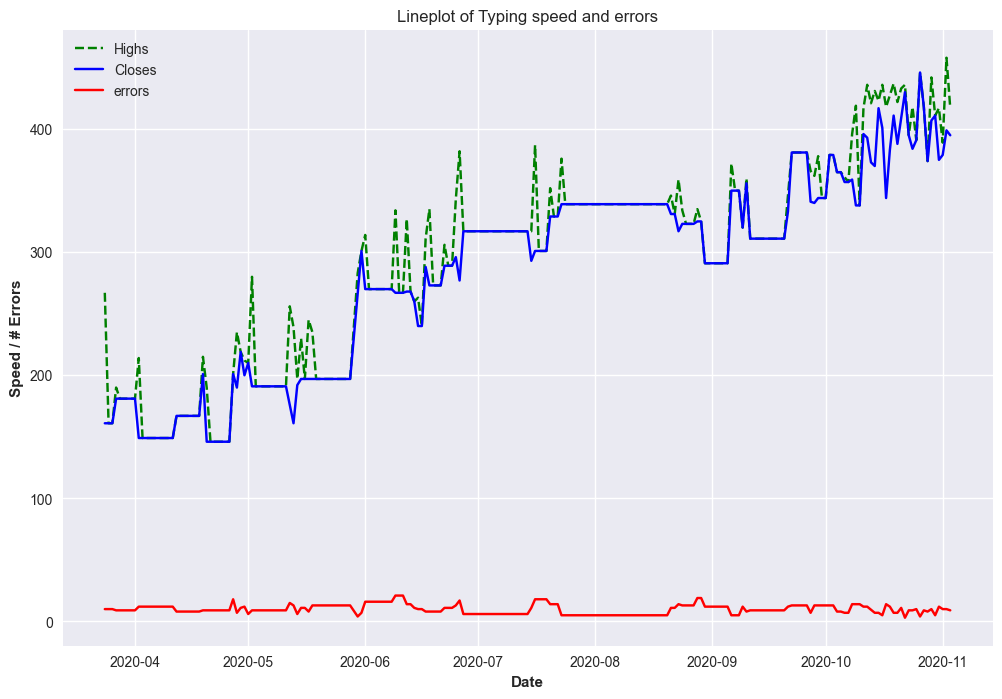

In [12]:
plt.style.use("seaborn")
fig = plt.figure(figsize=(12,8))
plt.plot(ohlc_df['high'], '--', color='green', label='Highs')
plt.plot(ohlc_df['close'], '-', color='blue', label='Closes')
plt.plot(err_df['close'], 'x-', color='red', label='errors')
plt.title("Lineplot of Typing speed and errors")
plt.ylabel("Speed / # Errors")
plt.xlabel("Date")
plt.legend()
plt.show()